<a href="https://colab.research.google.com/github/fsoto21/TelecomX_Parte2_Latam/blob/main/TelecomX_Parte_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>**Challenge Telecom X: análisis de evasión de clientes Sengunda Parte**</h1>

---
---




📌<font color='gray'>**Extracción del Archivo Tratado**

---

In [1]:
import pandas as pd

# Cargar archivo
datos = pd.read_csv('/content/df.csv')

# Mapear 'género'
datos['gender'] = datos['gender'].map({'Male': 0, 'Female': 1})

# Corregir nombre mal escrito
datos = datos.rename(columns={'cuidadano_mayor': 'ciudadano_mayor'})

# Mapear 'Churn' correctamente
datos['Churn'] = datos['Churn'].map({'No': 0, 'Yes': 1})

# Convertir salida de 'Churn' a numeros enteros
datos['Churn'] = pd.to_numeric(datos['Churn'], errors='coerce').astype('Int64')

# Mostrar las primeras filas
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,1,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0,0,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1,0,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1,0,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,1,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [2]:
print(datos.columns)

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   Int64  
 2   gender            7267 non-null   int64  
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [4]:
datos.isnull().sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [5]:
print(datos['Churn'].value_counts(dropna=False))
print(datos['gender'].value_counts(dropna=False))


Churn
0       5174
1       1869
<NA>     224
Name: count, dtype: Int64
gender
0    3675
1    3592
Name: count, dtype: int64


In [6]:
# Eliminar filas donde Churn es NaN
datos = datos.dropna(subset=['Churn'])

# Confirmar que ya no hay nulos
print(datos['Churn'].isna().sum())
print(datos.shape)


0
(7043, 21)


In [7]:
datos.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [8]:
datos.describe()

,Churn,gender,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.26537,0.495244,0.162147,32.371149,64.761692,2279.734304
std,0.441561,0.500013,0.368612,24.559481,30.090047,2266.794470
min,0.0,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.0,0.000000,0.000000,9.000000,35.500000,398.550000
50%,0.0,0.000000,0.000000,29.000000,70.350000,1394.550000
75%,1.0,1.000000,0.000000,55.000000,89.850000,3786.600000
max,1.0,1.000000,1.000000,72.000000,118.750000,8684.800000


<font color='gray'>**Manejo de Inconsistencias**

---

In [9]:
# Manejo de valores nulos en 'Charges.Total'
datos['Charges.Total'] = pd.to_numeric(datos['Charges.Total'], errors='coerce').fillna(0.0)

# Convertir 'SeniorCitizen' a booleano
if datos['SeniorCitizen'].dtype != 'bool':
    datos['SeniorCitizen'] = datos['SeniorCitizen'].astype(bool)

# Confirmar cambios
print("\nTipo de datos de 'SeniorCitizen':", datos['SeniorCitizen'].dtype)
print("\nInformación final del DataFrame:")
datos.info()



Tipo de datos de 'SeniorCitizen': bool

Información final del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   Int64  
 2   gender            7043 non-null   int64  
 3   SeniorCitizen     7043 non-null   bool   
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   70

/tmp/ipython-input-358060963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Charges.Total'] = pd.to_numeric(datos['Charges.Total'], errors='coerce').fillna(0.0)
/tmp/ipython-input-358060963.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['SeniorCitizen'] = datos['SeniorCitizen'].astype(bool)


<font color='gray'>**Eliminando identificadores únicos**

---


Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.


In [10]:
# Elimina columnas que no aportan valor al análisis o a los modelos predictivos
datos = datos.drop(['customerID'], axis=1)

In [11]:
datos

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0,1,False,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0,0,False,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,1,0,False,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,1,0,True,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,1,1,True,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,1,False,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,1,0,False,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,0,0,False,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,0,0,False,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [12]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   Int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   bool   
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
 17  

<font color='gray'>**Correlación y selección de variables**

---

In [13]:
import pandas as pd
import sklearn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

variables_categoricas = [
    'gender',
    'Partner',
    'Dependents',
    'InternetService',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

# Detectar versión y parámetro correcto para OneHotEncoder
version = sklearn.__version__
args = {}
if version >= '1.2':
    args['sparse_output'] = False
else:
    args['sparse'] = False

one_hot_encoder = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', **args), variables_categoricas),
    remainder='passthrough'
)

X_array = one_hot_encoder.fit_transform(datos.drop(columns=['Churn']))

nombres_codificados = one_hot_encoder.named_transformers_['onehotencoder'].get_feature_names_out(variables_categoricas)
columnas_restantes = [col for col in datos.drop(columns=['Churn']).columns if col not in variables_categoricas]
columnas_finales = list(nombres_codificados) + columnas_restantes

datos_codificados = pd.DataFrame(X_array, columns=columnas_finales)
datos_codificados['Churn'] = datos['Churn'].values

print(datos_codificados.head())



  gender_0 gender_1 Partner_No Partner_Yes Dependents_No Dependents_Yes  \
0      0.0      1.0        0.0         1.0           0.0            1.0   
1      1.0      0.0        1.0         0.0           1.0            0.0   
2      1.0      0.0        1.0         0.0           1.0            0.0   
3      1.0      0.0        0.0         1.0           1.0            0.0   
4      0.0      1.0        0.0         1.0           1.0            0.0   

  InternetService_DSL InternetService_Fiber optic InternetService_No  \
0                 1.0                         0.0                0.0   
1                 1.0                         0.0                0.0   
2                 0.0                         1.0                0.0   
3                 0.0                         1.0                0.0   
4                 0.0                         1.0                0.0   

  Contract_Month-to-month  ... MultipleLines OnlineSecurity OnlineBackup  \
0                     0.0  ...          

In [14]:
# Mostrar tipos de datos por columna
print(datos_codificados.dtypes)

# Verificar si hay alguna columna que no sea numérica
no_numericas = datos_codificados.select_dtypes(exclude=['number']).columns.tolist()

if len(no_numericas) == 0:
    print("Todas las columnas son numéricas.")
else:
    print("Estas columnas NO son numéricas:")
    print(no_numericas)


gender_0                                   object
gender_1                                   object
Partner_No                                 object
Partner_Yes                                object
Dependents_No                              object
Dependents_Yes                             object
InternetService_DSL                        object
InternetService_Fiber optic                object
InternetService_No                         object
Contract_Month-to-month                    object
Contract_One year                          object
Contract_Two year                          object
PaperlessBilling_No                        object
PaperlessBilling_Yes                       object
PaymentMethod_Bank transfer (automatic)    object
PaymentMethod_Credit card (automatic)      object
PaymentMethod_Electronic check             object
PaymentMethod_Mailed check                 object
SeniorCitizen                              object
tenure                                     object


In [15]:
# DataFrame tipo numérico

datos_codificados = datos_codificados.apply(pd.to_numeric, errors='coerce')


In [16]:
print(datos_codificados.dtypes)


gender_0                                   float64
gender_1                                   float64
Partner_No                                 float64
Partner_Yes                                float64
Dependents_No                              float64
Dependents_Yes                             float64
InternetService_DSL                        float64
InternetService_Fiber optic                float64
InternetService_No                         float64
Contract_Month-to-month                    float64
Contract_One year                          float64
Contract_Two year                          float64
PaperlessBilling_No                        float64
PaperlessBilling_Yes                       float64
PaymentMethod_Bank transfer (automatic)    float64
PaymentMethod_Credit card (automatic)      float64
PaymentMethod_Electronic check             float64
PaymentMethod_Mailed check                 float64
SeniorCitizen                                 bool
tenure                         

<font color='gray'>**Matrix de Correlación**

---

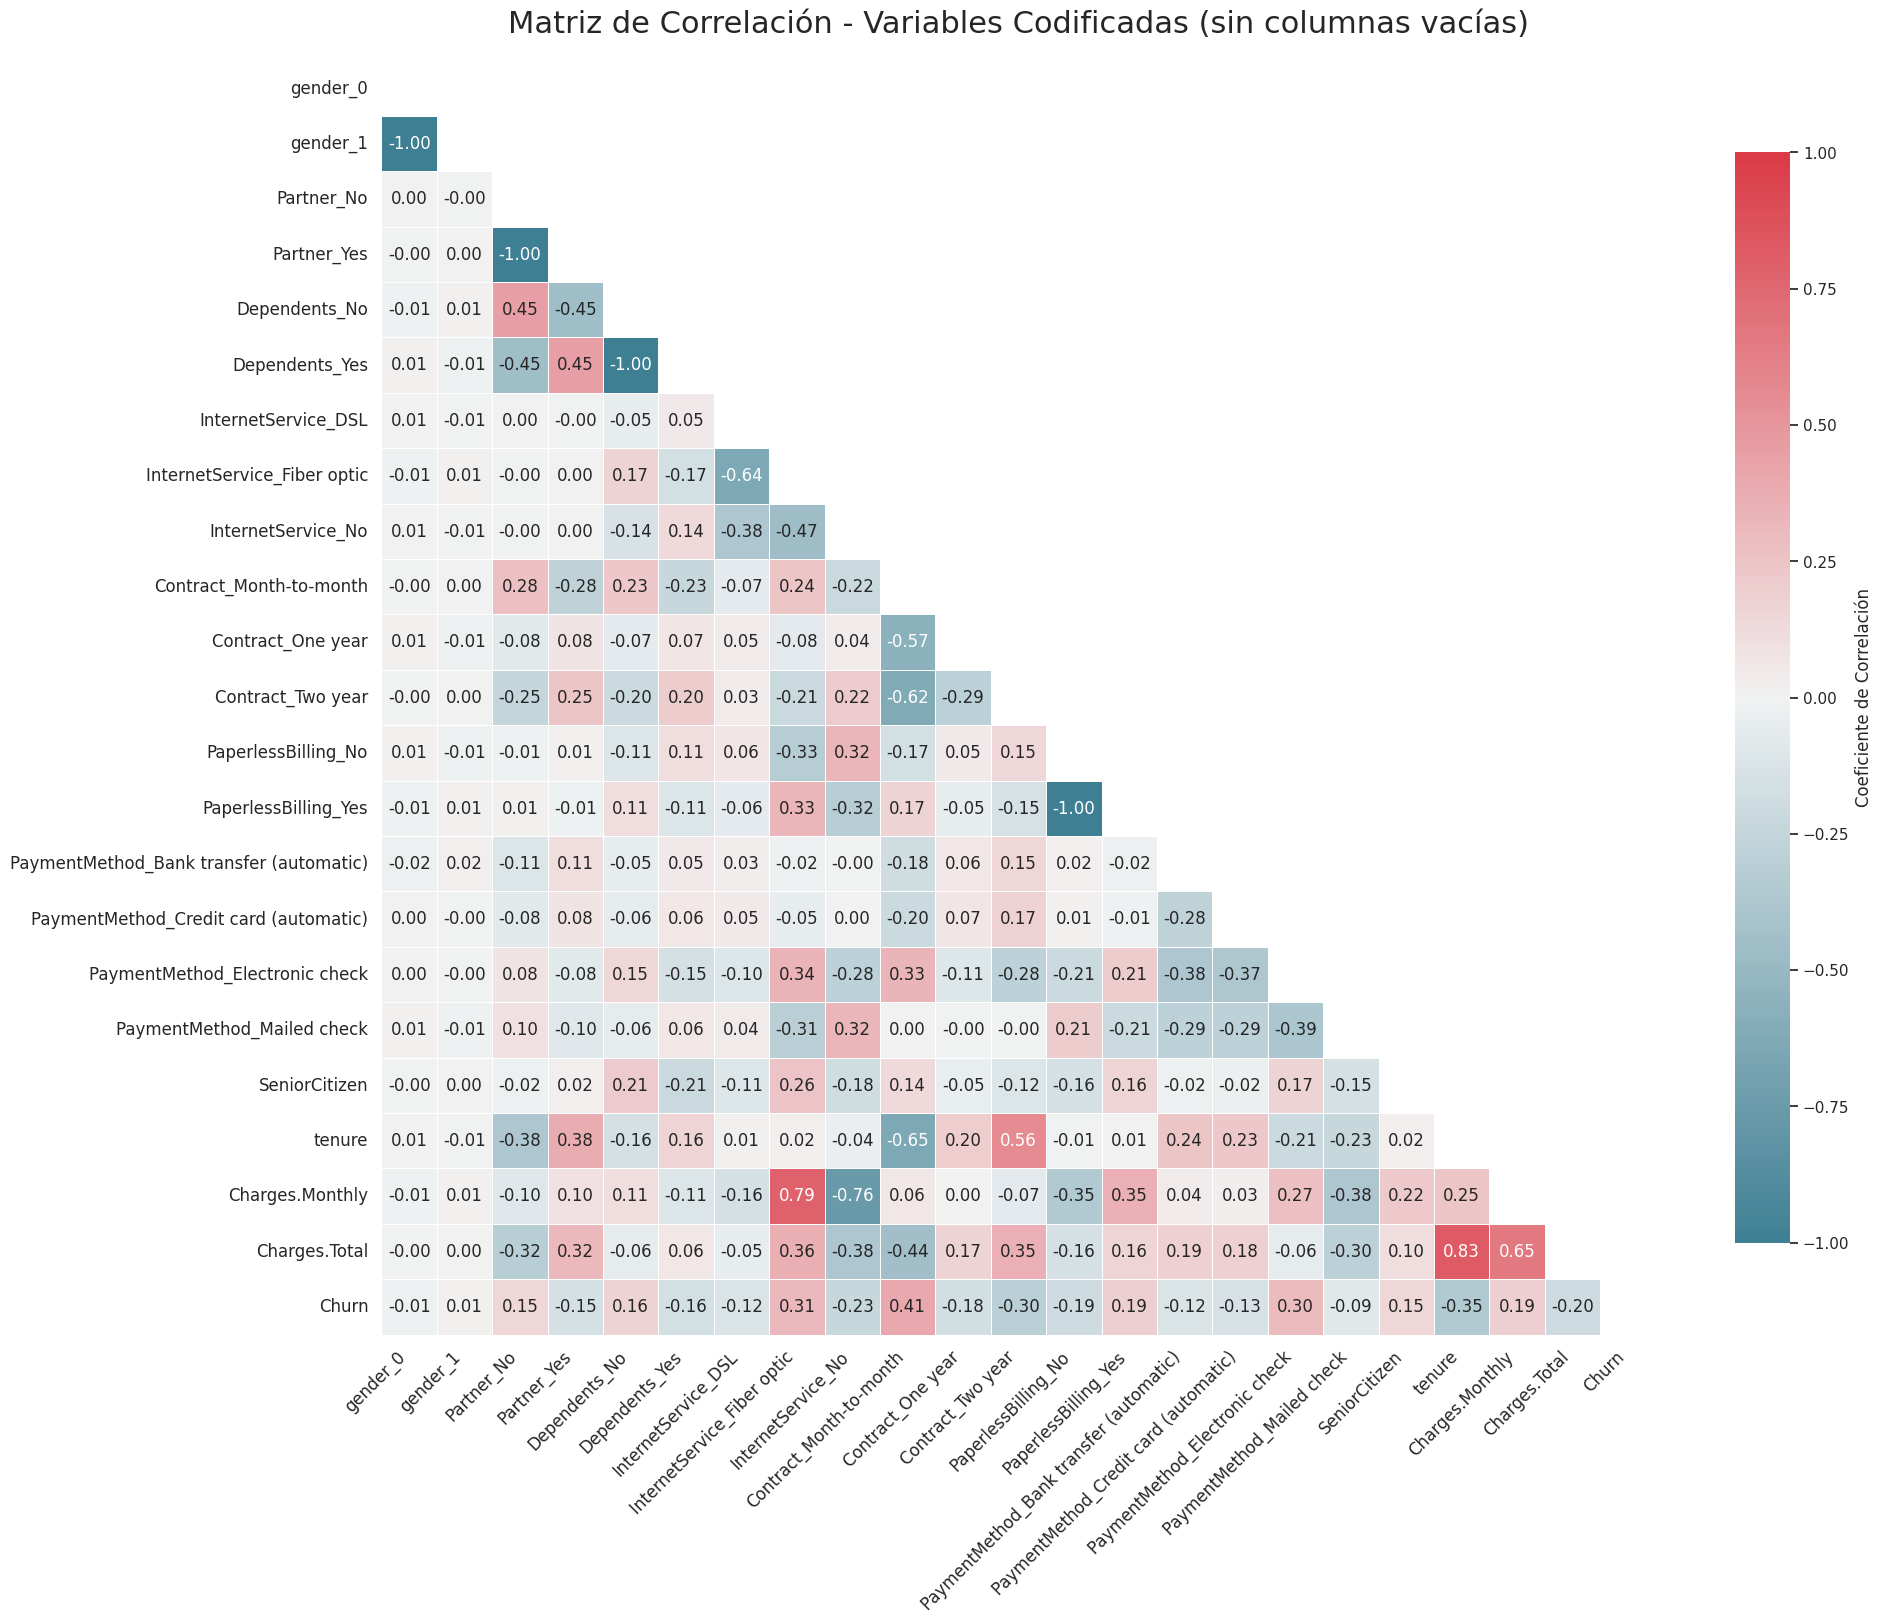

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar columnas con todos valores nulos
datos_limpios = datos_codificados.dropna(axis=1, how='all')

# Calcular matriz de correlación
corr = datos_limpios.corr()

# Crear máscara para ocultar mitad superior
mascara = np.triu(np.ones_like(corr, dtype=bool))

# Configurar figura y estilo
plt.figure(figsize=(20, 18))
sns.set(style="white")

# Paleta de colores divergente
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Dibujar heatmap con anotaciones y barra de color
ax = sns.heatmap(
    corr,
    mask=mascara,
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=0.5,
    annot=True,
    fmt=".2f",
    cbar_kws={"shrink": 0.7, 'label': 'Coeficiente de Correlación'}
)

# Título y etiquetas legibles
plt.title("Matriz de Correlación - Variables Codificadas (sin columnas vacías)", fontsize=22, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()


<font color='gray'>**Análisis Dirigido**

---

In [19]:
import numpy as np

def ancho_bin(df, columna):
    # Calcula el percentil 75 (Q3) y el percentil 25 (Q1) de la columna
    q75, q25 = np.percentile(df[columna], [75, 25])

    # Calcula el rango intercuartílico (IQR)
    iqr = q75 - q25

    # Aplica la fórmula de Freedman-Diaconis
    ancho = 2 * iqr * np.power(len(df[columna]), -1/3)

    return ancho
    print(f"Ancho óptimo del bin para: {ancho}")


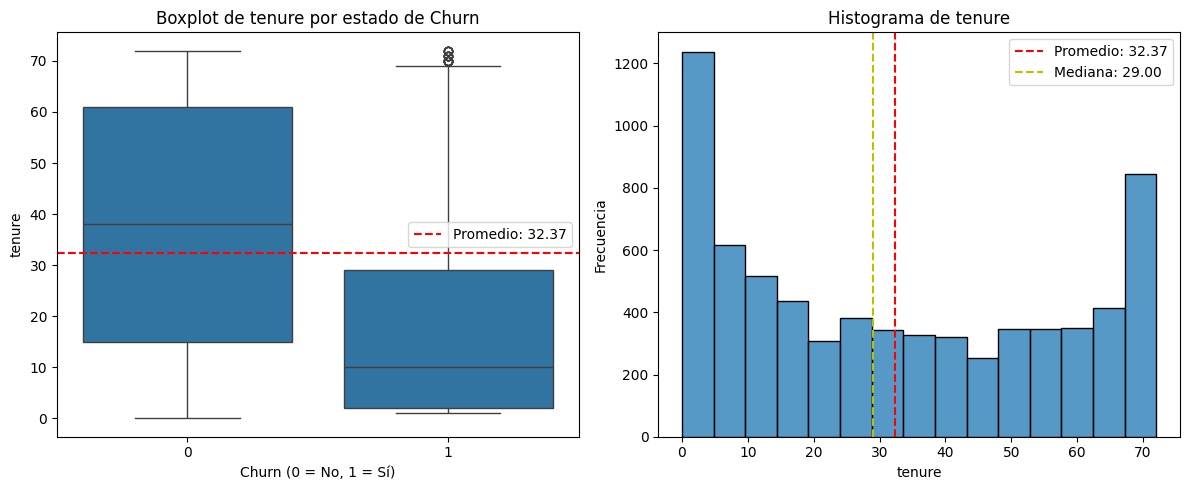

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def ancho_bin(df, columna):
    serie = df[columna].dropna()
    q75, q25 = np.percentile(serie, [75, 25])
    iqr = q75 - q25
    ancho = 2 * iqr * (len(serie) ** (-1/3))
    return max(ancho, 1e-6)

columna = 'tenure'
target = 'Churn'

media = datos_codificados[columna].mean()
mediana = datos_codificados[columna].median()

binwidth = ancho_bin(datos_codificados, columna)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=datos_codificados, x=target, y=columna, ax=ax[0])
ax[0].set_title(f'Boxplot de {columna} por estado de {target}')
ax[0].set_xlabel(f'{target} (0 = No, 1 = Sí)')
ax[0].set_ylabel(columna)
ax[0].axhline(media, color='r', linestyle='--', label=f'Promedio: {media:.2f}')
ax[0].legend()

sns.histplot(data=datos_codificados, x=columna, binwidth=binwidth, ax=ax[1])
ax[1].set_title(f'Histograma de {columna}')
ax[1].set_xlabel(columna)
ax[1].set_ylabel('Frecuencia')
ax[1].axvline(media, color='r', linestyle='--', label=f'Promedio: {media:.2f}')
ax[1].axvline(mediana, color='y', linestyle='--', label=f'Mediana: {mediana:.2f}')
ax[1].legend()

plt.tight_layout()
plt.show()


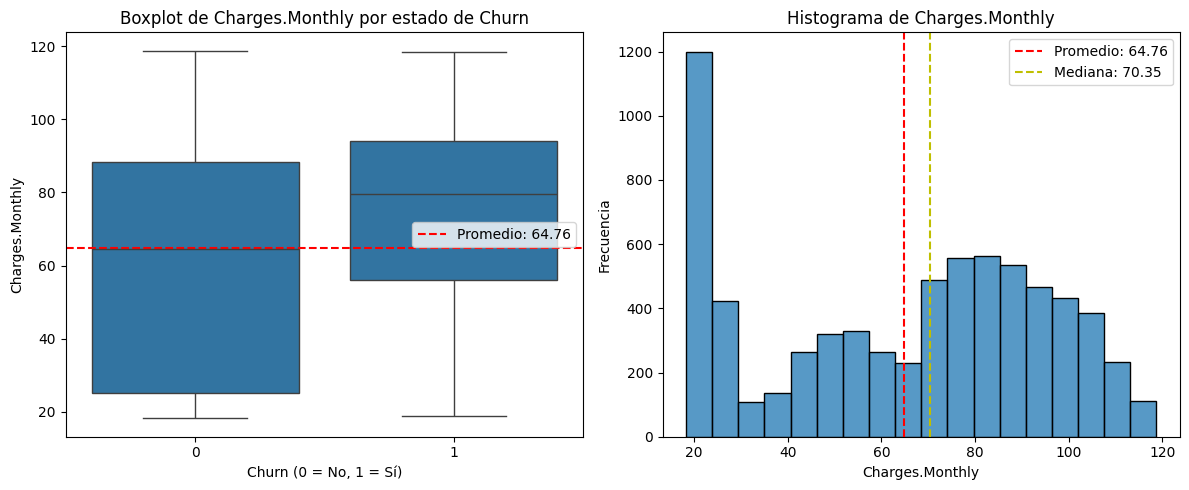

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Función para calcular ancho de bin (Freedman-Diaconis)
def ancho_bin(df, columna):
    serie = df[columna].dropna()
    q75, q25 = np.percentile(serie, [75, 25])
    iqr = q75 - q25
    ancho = 2 * iqr * (len(serie) ** (-1/3))
    return max(ancho, 1e-6)

# Datos a usar
columna = 'Charges.Monthly'
target = 'Churn'

# Calcular promedio y mediana
media = datos_codificados[columna].mean()
mediana = datos_codificados[columna].median()

# Calcular ancho óptimo de bins
binwidth = ancho_bin(datos_codificados, columna)

# Crear figura y ejes
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot: comparar Charges.Monthly entre churn=0 y churn=1
sns.boxplot(data=datos_codificados, x=target, y=columna, ax=ax[0])
ax[0].set_title(f'Boxplot de {columna} por estado de {target}')
ax[0].set_xlabel(f'{target} (0 = No, 1 = Sí)')
ax[0].set_ylabel(columna)
ax[0].axhline(media, color='r', linestyle='--', label=f'Promedio: {media:.2f}')
ax[0].legend()

# Histograma
sns.histplot(data=datos_codificados, x=columna, binwidth=binwidth, ax=ax[1])
ax[1].set_title(f'Histograma de {columna}')
ax[1].set_xlabel(columna)
ax[1].set_ylabel('Frecuencia')
ax[1].axvline(media, color='r', linestyle='--', label=f'Promedio: {media:.2f}')
ax[1].axvline(mediana, color='y', linestyle='--', label=f'Mediana: {mediana:.2f}')
ax[1].legend()

plt.tight_layout()
plt.show()


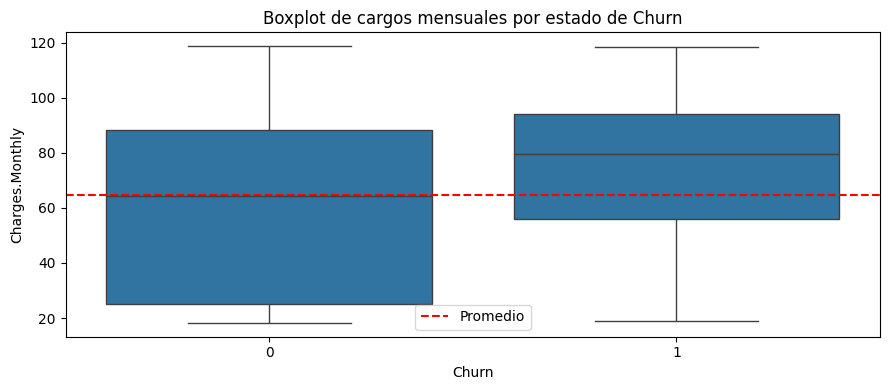

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular promedio de Charges.Monthly
charges_media = datos_codificados['Charges.Monthly'].mean()

# Crear figura y eje
fig, ax = plt.subplots(figsize=(9, 4))

# Boxplot para comparar cargos mensuales por estado de Churn (0=No, 1=Sí)
sns.boxplot(data=datos_codificados, x='Churn', y='Charges.Monthly', ax=ax)

# Añadir título y línea de promedio
ax.set_title('Boxplot de cargos mensuales por estado de Churn')
ax.axhline(y=charges_media, color='r', linestyle='--', label='Promedio')
ax.legend()

plt.tight_layout()
plt.show()


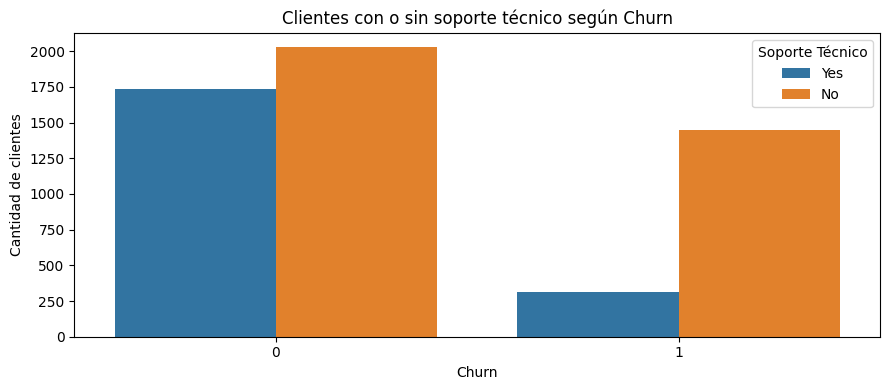

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que tu DataFrame original es 'datos'
# Filtrar filas donde TechSupport no sea 'No internet service'
df_filtrado = datos[datos['TechSupport'] != 'No internet service']

# Crear figura y eje
fig, ax = plt.subplots(figsize=(9, 4))

# Conteo de clientes por Churn y TechSupport
sns.countplot(data=df_filtrado, x='Churn', hue='TechSupport', ax=ax)

# Títulos y etiquetas
ax.set_title('Clientes con o sin soporte técnico según Churn')
ax.set_xlabel('Churn')
ax.set_ylabel('Cantidad de clientes')
ax.legend(title='Soporte Técnico')

plt.tight_layout()
plt.show()


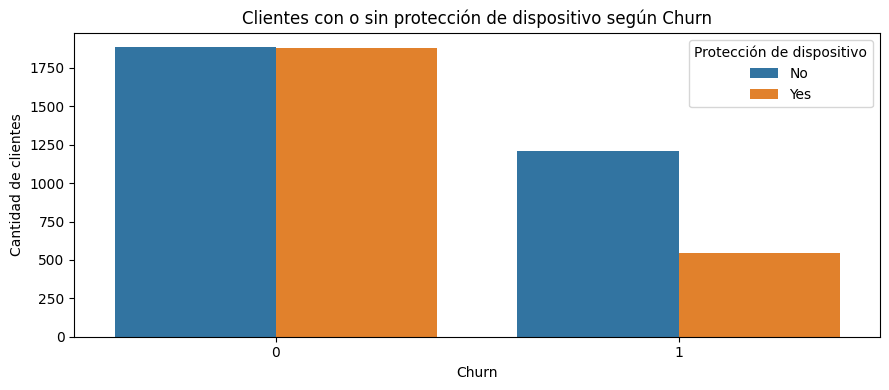

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar filas donde DeviceProtection no sea 'No internet service' (si aplica)
df_filtrado = datos[datos['DeviceProtection'] != 'No internet service']

# Crear figura y eje
fig, ax = plt.subplots(figsize=(9, 4))

# Conteo de clientes por Churn y DeviceProtection
sns.countplot(data=df_filtrado, x='Churn', hue='DeviceProtection', ax=ax)

# Títulos y etiquetas
ax.set_title('Clientes con o sin protección de dispositivo según Churn')
ax.set_xlabel('Churn')
ax.set_ylabel('Cantidad de clientes')
ax.legend(title='Protección de dispositivo')

plt.tight_layout()
plt.show()


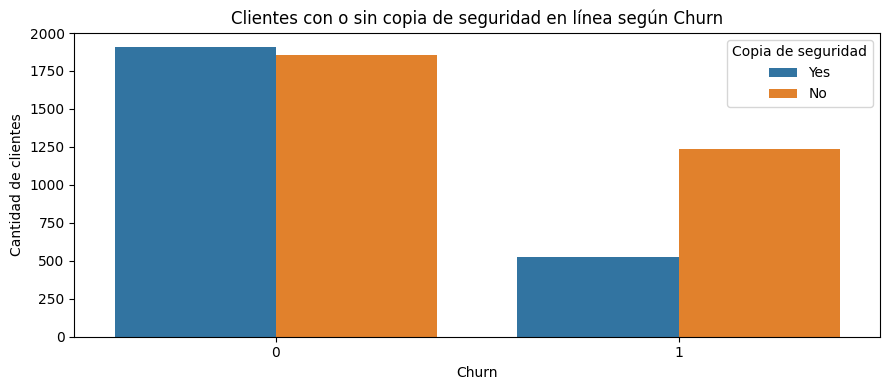

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar filas donde OnlineBackup no sea 'No internet service'
df_filtrado = datos[datos['OnlineBackup'] != 'No internet service']

# Crear figura y eje
fig, ax = plt.subplots(figsize=(9, 4))

# Conteo de clientes por Churn y OnlineBackup
sns.countplot(data=df_filtrado, x='Churn', hue='OnlineBackup', ax=ax)

# Títulos y etiquetas
ax.set_title('Clientes con o sin copia de seguridad en línea según Churn')
ax.set_xlabel('Churn')
ax.set_ylabel('Cantidad de clientes')
ax.legend(title='Copia de seguridad')

plt.tight_layout()
plt.show()


<font color='gray'>**Customer_ternure segun churn**

---

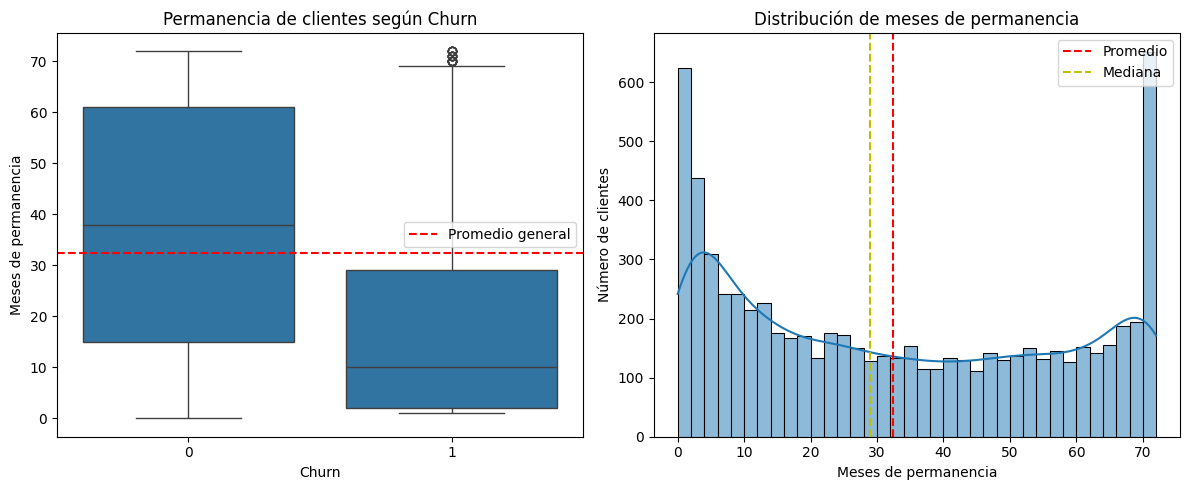

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular medidas estadísticas
tenure_promedio = datos_codificados['tenure'].mean()
tenure_mediana = datos_codificados['tenure'].median()

# Crear figura y ejes
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Boxplot de tenure según churn
sns.boxplot(
    data=datos_codificados,
    x='Churn',
    y='tenure',
    ax=ax[0]
)
ax[0].set_title('Permanencia de clientes según Churn')
ax[0].set_xlabel('Churn')
ax[0].set_ylabel('Meses de permanencia')
ax[0].axhline(y=tenure_promedio, color='r', linestyle='--', label='Promedio general')
ax[0].legend()

# Gráfico 2: Histograma de tenure
sns.histplot(
    data=datos_codificados,
    x='tenure',
    kde=True,
    ax=ax[1],
    binwidth=2
)
ax[1].set_title('Distribución de meses de permanencia')
ax[1].set_xlabel('Meses de permanencia')
ax[1].set_ylabel('Número de clientes')
ax[1].axvline(x=tenure_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=tenure_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

# Ajustar diseño
plt.tight_layout()
plt.show()


<font color='gray'>**Verificación de la Proporción de Cancelación (Churn)**

---

In [27]:
proporciones = datos_codificados['Churn'].value_counts(normalize=True)
print(proporciones)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: Float64


Las proporciones estan algo desiguales

<font color='gray'>**Modelo Predictivo**

---
---

<font color='gray'>**Separación de Datos**

---

In [28]:
from sklearn.model_selection import train_test_split

# Variables predictoras (quitamos 'Churn')
X = datos_codificados.drop(['Churn'], axis=1)

# Variable objetivo
y = datos_codificados['Churn']

# Dividir en train y test (20% test), estratificando por y para mantener proporciones
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(f'Tamaño X_train: {X_train.shape}')
print(f'Tamaño X_test: {X_test.shape}')
print(f'Tamaño y_train: {y_train.shape}')
print(f'Tamaño y_test: {y_test.shape}')

Tamaño X_train: (5634, 30)
Tamaño X_test: (1409, 30)
Tamaño y_train: (5634,)
Tamaño y_test: (1409,)


<font color='gray'>**Normalización / Estandarización**

---

Solo para modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Variables categóricas
variables_categoricas = [
    'Partner',
    'Dependents',
    'InternetService',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# Variables numéricas
variables_numericas = ['SeniorCitizen', 'tenure', 'Charges.Monthly']

# Separar X e y
X = datos.drop(columns=['Churn'])
y = datos['Churn']

# Dividir train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Preprocesamiento: codificar categóricas + escalar numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), variables_categoricas),
        ('num', StandardScaler(), variables_numericas)
    ]
)

# Ajustar y transformar datos de entrenamiento
X_train_scaled = preprocessor.fit_transform(X_train)

# Solo transformar datos de prueba
X_test_scaled = preprocessor.transform(X_test)

print(f'X_train_scaled shape: {X_train_scaled.shape}')
print(f'X_test_scaled shape: {X_test_scaled.shape}')


X_train_scaled shape: (5634, 40)
X_test_scaled shape: (1409, 40)


<font color='gray'>**Balanceo de clases**

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Aplicar SMOTE sobre datos ya codificados y escalados
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)


In [31]:
import numpy as np

print(f'Tamaño antes de SMOTE: {X_train_scaled.shape}')
print(f'Tamaño después de SMOTE: {X_train_bal.shape}')
print('Distribución original de clases:\n', y_train.value_counts())

# Para y_train_bal que es array, usa np.bincount o pandas.Series
import pandas as pd
print('Distribución balanceada de clases:\n', pd.Series(y_train_bal).value_counts())


Tamaño antes de SMOTE: (5634, 40)
Tamaño después de SMOTE: (8278, 40)
Distribución original de clases:
 Churn
0    4139
1    1495
Name: count, dtype: Int64
Distribución balanceada de clases:
 Churn
0    4139
1    4139
Name: count, dtype: Int64


<font color='gray'>**Creación de Modelos**

---
---


<font color='gray'>**Modelo Random Forest Classifier**

---

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Entrenar el modelo con los datos balanceados y escalados
modelo_random_forest = RandomForestClassifier(max_depth=5, random_state=42)
modelo_random_forest.fit(X_train_bal, y_train_bal)

# Predecir con los datos de prueba escalados (sin balancear)
y_predict = modelo_random_forest.predict(X_test_scaled)

# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("F1 Score:", f1_score(y_test, y_predict))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_predict))
print("Reporte completo:\n", classification_report(y_test, y_predict))

# Guardar matriz de confusión para uso posterior si quieres
matriz_confusion = confusion_matrix(y_test, y_predict)

Accuracy: 0.7508871540099361
Precision: 0.5210237659963437
Recall: 0.7620320855614974
F1 Score: 0.6188925081433225
Matriz de confusión:
 [[773 262]
 [ 89 285]]
Reporte completo:
               precision    recall  f1-score   support

         0.0       0.90      0.75      0.81      1035
         1.0       0.52      0.76      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.75      0.76      1409



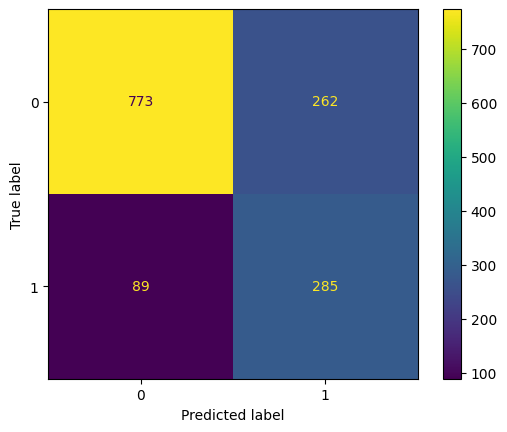

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion)
visualizacion.plot();  # El punto y coma evita mostrar la salida textual

In [38]:
importancias_random_forest = modelo_random_forest.feature_importances_
importancias_random_forest

array([0.00739658, 0.00725742, 0.00398647, 0.00219967, 0.00802604,
       0.03681267, 0.00773964, 0.16725488, 0.04173224, 0.10829405,
       0.01458178, 0.0162532 , 0.00608949, 0.00664337, 0.07976481,
       0.00186429, 0.00111508, 0.00052141, 0.00263485, 0.09826351,
       0.00516864, 0.02064985, 0.01907661, 0.00727584, 0.00378322,
       0.01672381, 0.01351206, 0.00225485, 0.11609039, 0.00411916,
       0.01931322, 0.00151304, 0.00415835, 0.0017506 , 0.00183311,
       0.0112112 , 0.00319655, 0.00067185, 0.11313725, 0.01612895])

In [39]:
import pandas as pd

# Obtener nombres de columnas transformadas
nombres_features_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(variables_categoricas)
nombres_features_num = variables_numericas
nombres_features = list(nombres_features_cat) + list(nombres_features_num)

# Crear DataFrame con importancias en porcentaje
feature_importances = pd.DataFrame({
    'feature': nombres_features,
    'importances': (importancias_random_forest * 100)
}).sort_values('importances', ascending=False)

print(feature_importances)


                                    feature  importances
7                   Contract_Month-to-month    16.725488
28                           TechSupport_No    11.609039
38                                   tenure    11.313725
9                         Contract_Two year    10.829405
19                        OnlineSecurity_No     9.826351
14           PaymentMethod_Electronic check     7.976481
8                         Contract_One year     4.173224
5               InternetService_Fiber optic     3.681267
21                       OnlineSecurity_Yes     2.064985
30                          TechSupport_Yes     1.931322
22                          OnlineBackup_No     1.907661
25                      DeviceProtection_No     1.672381
11                     PaperlessBilling_Yes     1.625320
39                          Charges.Monthly     1.612895
10                      PaperlessBilling_No     1.458178
26     DeviceProtection_No internet service     1.351206
35      StreamingMovies_No inte

<font color='gray'>**Modelo XGBoost**

---

In [40]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

modelo_xgb = XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [43]:
# Entrenar el Modelo con datos balanceados y preprocesados

from xgboost import XGBClassifier

modelo_xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'  # o 'auc', 'error', según tu objetivo
)

modelo_xgb.fit(X_train_bal, y_train_bal)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [44]:
# Predecir con datos de prueba preprocesados
y_pred = modelo_xgb.predict(X_test_scaled)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte completo:\n", classification_report(y_test, y_pred))

matriz_confusion = confusion_matrix(y_test, y_pred)

Accuracy: 0.7771469127040455
Precision: 0.581081081081081
Recall: 0.5748663101604278
F1 Score: 0.5779569892473119
Matriz de confusión:
 [[880 155]
 [159 215]]
Reporte completo:
               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1035
         1.0       0.58      0.57      0.58       374

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



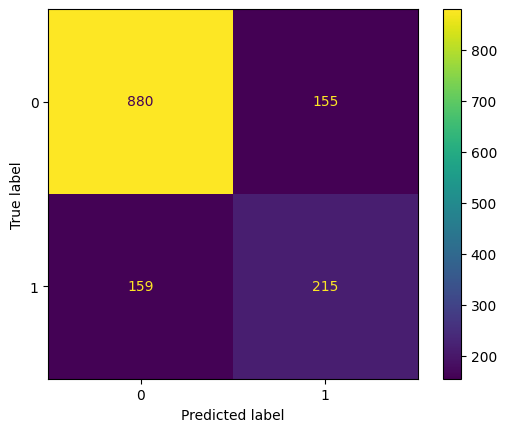

In [45]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

<font color='gray'>**Variables importantes**

---

<Figure size 800x600 with 0 Axes>

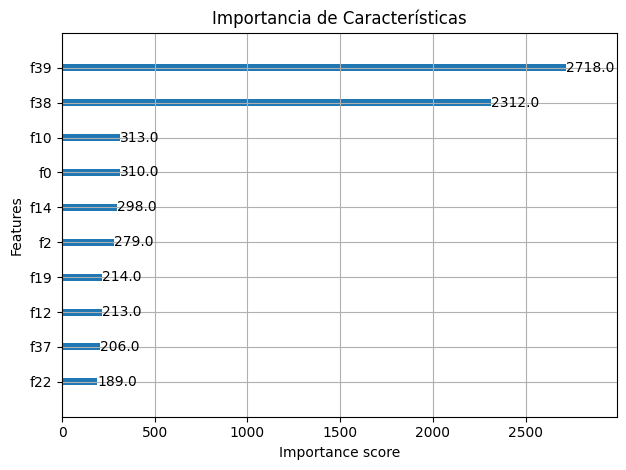

In [46]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plot_importance(modelo_xgb, max_num_features=10, importance_type='weight', title='Importancia de Características')
plt.tight_layout()
plt.show()


In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ),
    param_grid=param_grid,
    scoring='f1',      # métrica para clasificación binaria
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Usar datos preprocesados y balanceados
grid_search.fit(X_train_bal, y_train_bal)

print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor score (F1): {grid_search.best_score_:.4f}")


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:35:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mejores parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Mejor score (F1): 0.8217


In [50]:
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Usar el mejor modelo entrenado
mejor_modelo = grid_search.best_estimator_

# Predicciones sobre datos preprocesados de prueba
y_pred = mejor_modelo.predict(X_test_scaled)

# Evaluación
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

matriz_confusion = confusion_matrix(y_test, y_pred)

Mejores hiperparámetros encontrados:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Matriz de confusión:
 [[843 192]
 [110 264]]
Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.88      0.81      0.85      1035
         1.0       0.58      0.71      0.64       374

    accuracy                           0.79      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.79      0.79      1409



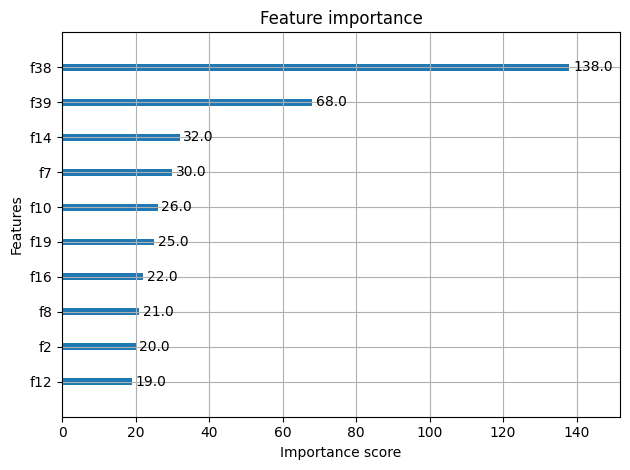

In [51]:
plot_importance(mejor_modelo, max_num_features=10)
plt.tight_layout()
plt.show()

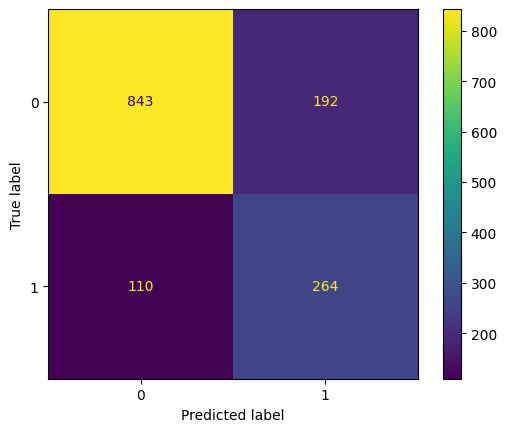

In [52]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

<font color='gray'>**Modelo KNN**

---

In [55]:
print(sorted(datos_codificados.columns.tolist())[:50])  # primeros 50
print('Partner' in datos_codificados.columns)           # checa existencia


['Charges.Monthly', 'Charges.Total', 'Churn', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'Dependents_No', 'Dependents_Yes', 'DeviceProtection', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'Partner_No', 'Partner_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'PhoneService', 'SeniorCitizen', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'gender_0', 'gender_1', 'tenure']
False


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores hiperparámetros: {'knn__n_neighbors': 23, 'knn__weights': 'uniform'}
Mejor F1 (CV): 0.5738

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      1035
         1.0       0.60      0.50      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



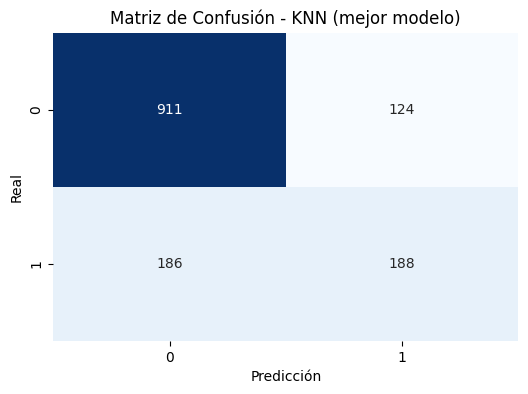

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# =====================
# 1. Limpieza de datos
# =====================
# Eliminar columnas con todos NaN
X = datos_codificados.drop(columns=['Churn']).dropna(axis=1, how='all')
y = datos_codificados['Churn']

# =====================
# 2. Train-test split
# =====================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Identificar columnas numéricas
cols_continuas = ['tenure', 'Charges.Monthly', 'Charges.Total']

# =====================
# 3. Preprocesamiento
# =====================
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # rellena NaN con la media
            ('scaler', StandardScaler())
        ]), cols_continuas),
        ('other', SimpleImputer(strategy='most_frequent'),
         [col for col in X.columns if col not in cols_continuas])
    ]
)

# =====================
# 4. Pipeline + GridSearch
# =====================
pipe = Pipeline(steps=[
    ('prep', preprocessor),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': list(range(1, 26)),
    'knn__weights': ['uniform', 'distance']
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# =====================
# 5. Entrenamiento
# =====================
grid.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid.best_params_)
print(f"Mejor F1 (CV): {grid.best_score_:.4f}")

# =====================
# 6. Evaluación en test
# =====================
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
mc = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(mc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - KNN (mejor modelo)')
plt.show()


<font color='gray'>**Hiperparametros KNN**

---

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Mejores hiperparámetros: {'knn__metric': 'manhattan', 'knn__n_neighbors': 19, 'knn__weights': 'uniform'}
Mejor F1 (CV): 0.5731

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      1035
         1.0       0.59      0.49      0.54       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.69      1409
weighted avg       0.76      0.78      0.77      1409



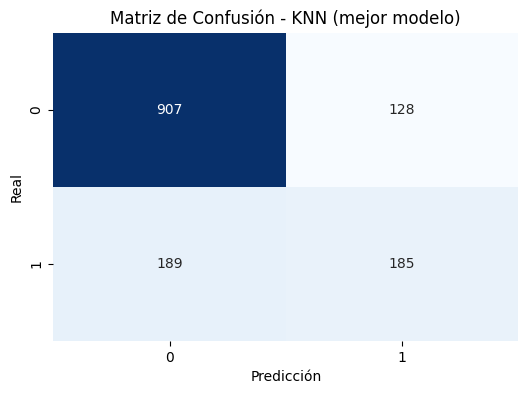

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# =====================
# 1. Limpieza de datos
# =====================
# Eliminar columnas con todos NaN
X = datos_codificados.drop(columns=['Churn']).dropna(axis=1, how='all')
y = datos_codificados['Churn']

# =====================
# 2. Train-test split
# =====================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Identificar columnas numéricas
cols_continuas = ['tenure', 'Charges.Monthly', 'Charges.Total']

# =====================
# 3. Preprocesamiento
# =====================
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # rellena NaN con la media
            ('scaler', StandardScaler())
        ]), cols_continuas),
        ('other', SimpleImputer(strategy='most_frequent'),
         [col for col in X.columns if col not in cols_continuas])
    ]
)

# =====================
# 4. Pipeline + GridSearch
# =====================
pipe = Pipeline(steps=[
    ('prep', preprocessor),
    ('knn', KNeighborsClassifier())
])

# Hiperparámetros a probar
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],  # vecinos
    'knn__weights': ['uniform', 'distance'],                   # pesos
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']      # métricas de distancia
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# =====================
# 5. Entrenamiento
# =====================
grid.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid.best_params_)
print(f"Mejor F1 (CV): {grid.best_score_:.4f}")

# =====================
# 6. Evaluación en test
# =====================
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
mc = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(mc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - KNN (mejor modelo)')
plt.show()


<font color='gray'>**Exportar modelo XGBoost**

---
---

In [61]:
mejor_modelo = grid_search.best_estimator_

import pickle

try:
    with open('championXGBoost.pkl', 'wb') as file:
        pickle.dump(mejor_modelo, file)
    print('Modelo serializado con éxito')
except Exception as e:
    print('Se presentó un error al almacenar el modelo:', str(e))



Modelo serializado con éxito


<font color='gray'>**Exportando modelo RandomForestClassifier**

---
---

In [62]:
import pickle

# Guardar el modelo
try:
    with open('championRandomForestClassifier.pkl', 'wb') as file:
        pickle.dump(modelo_random_forest, file)
    print('Modelo RandomForest serializado con éxito')
except Exception as e:
    print('Se presentó un error al almacenar el modelo:', str(e))

# Cargar el modelo (cuando lo necesites)
try:
    with open('championRandomForestClassifier.pkl', 'rb') as file:
        modelo_rf_cargado = pickle.load(file)
    print('Modelo RandomForest cargado con éxito')
except Exception as e:
    print('Error al cargar el modelo:', str(e))


Modelo RandomForest serializado con éxito
Modelo RandomForest cargado con éxito
